In [1]:
import pipeline as ppl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

C:\Users\Alec\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
enforcements = ppl.load_data("../Data/RCRA_ENFORCEMENTS.csv")
evaluations = ppl.load_data("../Data/RCRA_EVALUATIONS.csv")
facilities = ppl.load_data("../Data/RCRA_FACILITIES.csv")
naics = ppl.load_data("../Data/RCRA_NAICS.csv")
violations = ppl.load_data("../Data/RCRA_VIOLATIONS.csv")
violations['SCHEDULED_COMPLIANCE_DATE'] = violations['SCHEDULED_COMPLIANCE_DATE'].astype(str)
viosnc_history = ppl.load_data("../Data/RCRA_VIOSNC_HISTORY.csv")

In [3]:
dfs = [enforcements, evaluations, facilities, naics, violations, viosnc_history]
dfs_name = ["enforcements", "evaluations", "facilities", "naics", "violations", "viosnc_history"]

for i, df in enumerate(dfs):
    meta = ppl.generate_metadata(df)
    summary = ppl.generate_summary(df)
    print(dfs_name[i], "\n", "There are", len(df), "observations of", len(meta), "variables:\n")
    print(meta, "\n")
    print("Summary of numeric variables\n", summary)
    print("-----------------------------------------------------------------------")

enforcements 
 There are 332540 observations of 11 variables:

                    colname                     type  pct_null
0                 ID_NUMBER            <class 'str'>  0.000000
1         ACTIVITY_LOCATION            <class 'str'>  0.000000
2    ENFORCEMENT_IDENTIFIER            <class 'str'>  0.000000
3          ENFORCEMENT_TYPE            <class 'str'>  0.000000
4          ENFORCEMENT_DESC            <class 'str'>  0.000069
5        ENFORCEMENT_AGENCY            <class 'str'>  0.000000
6   ENFORCEMENT_ACTION_DATE            <class 'str'>  0.000000
7                PMP_AMOUNT  <class 'numpy.float64'>  0.955380
8                FMP_AMOUNT  <class 'numpy.float64'>  0.919856
9                FSC_AMOUNT  <class 'numpy.float64'>  0.997312
10               SCR_AMOUNT  <class 'numpy.float64'>  0.996364 

Summary of numeric variables
       colname           mean   median  min  max        std_dev   count
0  PMP_AMOUNT   71880.810855  10000.0  NaN  NaN  768122.800148  332540
1  FMP_

In [4]:
merged = evaluations.merge(facilities, how="left", on="ID_NUMBER")
merged = merged.merge(naics, how="left", on="ID_NUMBER")

In [5]:
merged.columns

Index(['ID_NUMBER', 'ACTIVITY_LOCATION_x', 'EVALUATION_IDENTIFIER',
       'EVALUATION_TYPE', 'EVALUATION_DESC', 'EVALUATION_AGENCY',
       'EVALUATION_START_DATE', 'FOUND_VIOLATION', 'FACILITY_NAME',
       'ACTIVITY_LOCATION_y', 'FULL_ENFORCEMENT', 'HREPORT_UNIVERSE_RECORD',
       'STREET_ADDRESS', 'CITY_NAME', 'STATE_CODE', 'ZIP_CODE', 'LATITUDE83',
       'LONGITUDE83', 'FED_WASTE_GENERATOR', 'TRANSPORTER', 'ACTIVE_SITE',
       'OPERATING_TSDF', 'ACTIVITY_LOCATION', 'NAICS_CODE'],
      dtype='object')

In [6]:
merged.head()

,ID_NUMBER,ACTIVITY_LOCATION_x,EVALUATION_IDENTIFIER,EVALUATION_TYPE,EVALUATION_DESC,EVALUATION_AGENCY,EVALUATION_START_DATE,FOUND_VIOLATION,FACILITY_NAME,ACTIVITY_LOCATION_y,...,STATE_CODE,ZIP_CODE,LATITUDE83,LONGITUDE83,FED_WASTE_GENERATOR,TRANSPORTER,ACTIVE_SITE,OPERATING_TSDF,ACTIVITY_LOCATION,NAICS_CODE
0,MND006156590,MN,032,FCI,FOCUSED COMPLIANCE INSPECTION,S,02/01/1990,N,FEDERAL CARTRIDGE COMPANY,MN,...,MN,55303,45.182678,-93.376346,1,N,HPA--,---ST-,MN,332992
1,MND006156590,MN,033,FRR,FINANCIAL RECORD REVIEW,S,09/28/1990,N,FEDERAL CARTRIDGE COMPANY,MN,...,MN,55303,45.182678,-93.376346,1,N,HPA--,---ST-,MN,332992
2,MND006156590,MN,034,CEI,COMPLIANCE EVALUATION INSPECTION ON-SITE,S,03/06/1991,Y,FEDERAL CARTRIDGE COMPANY,MN,...,MN,55303,45.182678,-93.376346,1,N,HPA--,---ST-,MN,332992
3,MND006156590,MN,035,FCI,FOCUSED COMPLIANCE INSPECTION,S,03/06/1991,Y,FEDERAL CARTRIDGE COMPANY,MN,...,MN,55303,45.182678,-93.376346,1,N,HPA--,---ST-,MN,332992
4,MND006156590,MN,036,CSE,COMPLIANCE SCHEDULE EVALUATION,S,09/30/1991,N,FEDERAL CARTRIDGE COMPANY,MN,...,MN,55303,45.182678,-93.376346,1,N,HPA--,---ST-,MN,332992


In [7]:
merged['EVALUATION_START_DATE'].iloc[0][6:]

'1990'

In [8]:
merged.loc[:, 'year'] = merged['EVALUATION_START_DATE'].str[6:].astype(int)

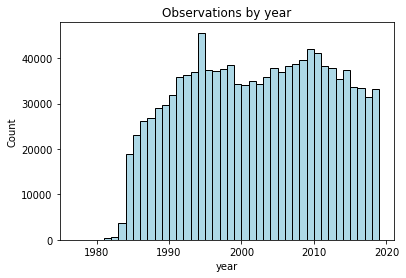

In [9]:
ppl.generate_histogram(merged, 'year', 'lightblue', 1, "Observations by year")

In [10]:
facilities['ID_NUMBER'].head(20)

0     LAD985226075
1     LAD985219443
2     LAD985219526
3     LAD985218890
4     LAR000003566
5     LAR000003574
6     AR0000998393
7     AR0000999011
8     AR0000999086
9     LAD985229111
10    LAD985229160
11    LAD985229194
12    LAD985227313
13    LAD985227370
14    LAD985227412
15    LAD985227453
16    LAD985227669
17    LAD985227685
18    LAD985215565
19    NJD986566669
Name: ID_NUMBER, dtype: object

In [11]:
bloop = facilities['FULL_ENFORCEMENT'] == facilities['OPERATING_TSDF']

In [12]:
bloop.value_counts()

False    1041254
dtype: int64

In [13]:
enforcements['ENFORCEMENT_IDENTIFIER'].value_counts()

001    149328
000     50647
002     20100
003     10710
004      7197
125      6229
105      5667
005      5358
006      4109
1        3673
115      3612
SFQ      3563
007      3150
123      2870
008      2483
DV1      2419
2        2255
312      2185
009      2055
101      1814
010      1772
200      1701
011      1477
3        1417
120      1296
012      1222
4        1088
013      1083
315      1062
014       997
        ...  
04          1
718         1
06          1
55A         1
Y21         1
737         1
553         1
JDC         1
567         1
SRS         1
992         1
TW          1
JAS         1
50A         1
96          1
526         1
495         1
54B         1
53A         1
560         1
MD3         1
44B         1
92          1
43A         1
742         1
BF          1
11A         1
C01         1
99          1
237         1
Name: ENFORCEMENT_IDENTIFIER, Length: 975, dtype: int64

In [14]:
enforcements['ENFORCEMENT_TYPE'].value_counts()

HQ120    194812
HQ310     22764
HQ210     15646
HQ110      9626
FL125      5942
FL105      5653
FL115      3603
WI124      3062
SC140      3003
HQ140      2863
FL123      2859
IL121      2677
MN121      2665
AZ161      2640
OR121      2615
FL312      2171
HQ510      2136
MO122      1919
09114      1825
HQ820      1825
AL115      1481
VA119      1437
MN122      1369
HQ610      1240
MT132      1172
IN217      1161
CO175      1103
HQ385      1039
FL315       954
TX141       914
          ...  
MI123         1
MN125         1
WI735         1
PA131         1
01862         1
OR215         1
MI124         1
AL861         1
ME211         1
03129         1
HQ865         1
WV841         1
RI121         1
AL343         1
WA125         1
WI123         1
06832         1
MI515         1
MD252         1
09226         1
FL436         1
VT121         1
01621         1
IL625         1
NH311         1
MN085         1
WV514         1
WI122         1
08132         1
WV840         1
Name: ENFORCEMENT_TYPE, 

In [15]:
evaluations['EVALUATION_IDENTIFIER'].value_counts()

001    455707
000    136739
002     52842
003     25755
CEN     20156
004     17074
CEI     16580
005     12837
NRR     12074
SFQ     11353
006     10178
MD1      9027
007      8508
601      7329
008      7155
009      6079
010      5478
1        5371
100      5156
011      4699
FRR      4415
GM1      4319
012      4120
013      3643
CNV      3427
014      3337
2        3268
200      3039
CV3      3018
015      2992
        ...  
$23         1
04J         1
66B         1
$34         1
MS2         1
DG1         1
N           1
61A         1
$18         1
37B         1
$11         1
MO          1
00R         1
04E         1
NJW         1
740         1
90A         1
PKE         1
760         1
86          1
4B3         1
752         1
JDW         1
50C         1
SBY         1
722         1
SFD         1
TED         1
815         1
06          1
Name: EVALUATION_IDENTIFIER, Length: 1272, dtype: int64

In [16]:
merged['year'].value_counts()

1994    45629
2009    41999
2010    41116
2008    39688
2007    38763
1998    38625
2011    38308
2006    38306
2004    37775
2012    37757
1997    37593
2014    37439
1995    37416
1996    37278
1993    37052
2005    36976
1992    36371
1991    35953
2003    35809
2013    35428
2001    34915
1999    34385
2002    34331
2000    34077
2015    33750
2016    33548
1990    31914
2017    31507
1989    29592
1988    29089
2018    27936
1987    26900
1986    26195
1985    23071
1984    18944
2019     5366
1983     3639
1982      654
1981      327
1980       35
6          23
1901        5
1919        4
1977        2
1911        2
5           2
1979        1
1961        1
1955        1
1954        1
1930        1
1920        1
Name: year, dtype: int64

In [17]:
print("Count of FOUND_VIOLATION (evaluation results)\n-----------------------------------------------")
merged['FOUND_VIOLATION'].value_counts()

Count of FOUND_VIOLATION (evaluation results)
-----------------------------------------------


N      809186
Y      404336
U       11978
Name: FOUND_VIOLATION, dtype: int64

In [18]:
evaluations['FOUND_VIOLATION'].value_counts()

N      652511
Y      329007
U        9678
Name: FOUND_VIOLATION, dtype: int64